# Visualisation of Emerald Auction Data

## Import data 

In [1]:
import pandas as pd 
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
auction_df = pd.read_csv('auction.csv') 

In [7]:
auction_df.head()

,id,category,name,image,thumbnail_image,small_image,medium_image,starting_price,minimum_increment,live_auction_item,units_available,minimum_next_bid,outbid_bidders,sold,total_bids,winner_name,winning_bid_amount,diff,created
0,1,hotel-ireland,"Exclusive Manor House Experience, Tulfarris Ho...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,10000,200,False,1,10200,0,1,1,Alvin Yeo,10000,0,2024-10-26T09:12:19.363179Z
1,2,hotel-ireland,Dublin & Wicklow Break - 5D/4N Trinity Townhou...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,2200,100,False,1,2600,1,1,2,Anonymous,2500,300,2024-10-26T12:19:30.124462Z
2,3,hotel-ireland,"Castlemartyr Resort, Cork, Presidential Suite ...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,3000,100,False,1,3300,0,1,1,Audrey Ruyters,3200,200,2024-10-13T04:20:23.457573Z
3,4,hotel-ireland,"Castlemartyr Resort, Cork, 4D/3N Luxury Reside...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,900,100,False,1,2500,4,1,5,Anonymous,2400,1500,2024-10-26T14:15:27.837792Z
4,5,hotel-ireland,"Sheen Falls Lodge, Kenmare, Deluxe Suite 4D/3N...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,1300,100,False,1,2400,2,1,3,Audrey Ruyters,2300,1000,2024-10-26T12:55:47.925774Z


## Basic information

In [10]:
auction_df.shape

(135, 19)

In [12]:
auction_df.describe()

,id,starting_price,minimum_increment,units_available,minimum_next_bid,outbid_bidders,sold,total_bids,winning_bid_amount,diff
count,135.000000,135.000000,135.000000,135.0,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,68.000000,1071.777778,68.518519,1.0,1407.259259,1.829630,0.985185,2.814815,1292.074074,220.296296
std,39.115214,1530.390579,30.383581,0.0,1620.314770,1.503929,0.121261,1.526801,1591.430895,554.038606
min,1.000000,100.000000,50.000000,1.0,250.000000,0.000000,0.000000,0.000000,0.000000,-3500.000000
25%,34.500000,300.000000,50.000000,1.0,550.000000,1.000000,1.000000,2.000000,475.000000,100.000000
50%,68.000000,600.000000,50.000000,1.0,900.000000,2.000000,1.000000,3.000000,800.000000,150.000000
75%,101.500000,1000.000000,100.000000,1.0,1450.000000,3.000000,1.000000,4.000000,1350.000000,350.000000
max,135.000000,10000.000000,200.000000,1.0,10200.000000,8.000000,1.000000,9.000000,10000.000000,2300.000000


In [14]:
auction_df['winning_bid_amount'].value_counts()

winning_bid_amount
800      8
600      8
300      6
900      6
1000     6
850      6
350      5
550      5
250      5
400      5
1200     5
200      4
450      4
500      4
1500     4
750      3
1300     3
700      3
1350     3
1800     2
0        2
650      2
10000    2
5000     2
2300     2
1700     2
813      1
1288     1
1355     1
1600     1
2600     1
418      1
3200     1
1050     1
1900     1
2200     1
310      1
655      1
1100     1
2800     1
2400     1
240      1
4200     1
3900     1
3000     1
2000     1
6800     1
5200     1
1950     1
501      1
4000     1
2500     1
6000     1
1400     1
Name: count, dtype: int64

In [16]:
unsold_items = auction_df[auction_df['winning_bid_amount'] == 0]

In [18]:
unsold_items_list = [] 

for i in unsold_items['name']:
    unsold_items_list.append(i)

print(unsold_items_list)

['Mother of Pearl Flutter Ring, with Peach Tourmaline, Pink Sapphire and Aquamarine in 18k Gold by Calla Lily', "Flower Still Life' by Dominique Desmeules, Acrylic on Canvas 92 x 122cm"]


In [20]:
sold_df = auction_df[auction_df['winning_bid_amount'] != 0]
sold_df.head()

,id,category,name,image,thumbnail_image,small_image,medium_image,starting_price,minimum_increment,live_auction_item,units_available,minimum_next_bid,outbid_bidders,sold,total_bids,winner_name,winning_bid_amount,diff,created
0,1,hotel-ireland,"Exclusive Manor House Experience, Tulfarris Ho...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,10000,200,False,1,10200,0,1,1,Alvin Yeo,10000,0,2024-10-26T09:12:19.363179Z
1,2,hotel-ireland,Dublin & Wicklow Break - 5D/4N Trinity Townhou...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,2200,100,False,1,2600,1,1,2,Anonymous,2500,300,2024-10-26T12:19:30.124462Z
2,3,hotel-ireland,"Castlemartyr Resort, Cork, Presidential Suite ...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,3000,100,False,1,3300,0,1,1,Audrey Ruyters,3200,200,2024-10-13T04:20:23.457573Z
3,4,hotel-ireland,"Castlemartyr Resort, Cork, 4D/3N Luxury Reside...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,900,100,False,1,2500,4,1,5,Anonymous,2400,1500,2024-10-26T14:15:27.837792Z
4,5,hotel-ireland,"Sheen Falls Lodge, Kenmare, Deluxe Suite 4D/3N...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,1300,100,False,1,2400,2,1,3,Audrey Ruyters,2300,1000,2024-10-26T12:55:47.925774Z


In [22]:
sold_df.shape

(133, 19)

In [24]:
sold_df.describe()

,id,starting_price,minimum_increment,units_available,minimum_next_bid,outbid_bidders,sold,total_bids,winning_bid_amount,diff
count,133.000000,133.000000,133.000000,133.0,133.000000,133.000000,133.0,133.000000,133.000000,133.000000
mean,68.090226,1039.022556,68.045113,1.0,1379.548872,1.857143,1.0,2.857143,1311.503759,272.481203
std,39.301565,1517.782905,30.362922,0.0,1616.177123,1.498195,0.0,1.498195,1595.415514,354.188886
min,1.000000,100.000000,50.000000,1.0,250.000000,0.000000,1.0,1.000000,200.000000,0.000000
25%,34.000000,300.000000,50.000000,1.0,550.000000,1.000000,1.0,2.000000,500.000000,100.000000
50%,68.000000,600.000000,50.000000,1.0,863.000000,2.000000,1.0,3.000000,800.000000,150.000000
75%,102.000000,1000.000000,100.000000,1.0,1405.000000,3.000000,1.0,4.000000,1350.000000,350.000000
max,135.000000,10000.000000,200.000000,1.0,10200.000000,8.000000,1.0,9.000000,10000.000000,2300.000000


**Basic information**

- Average winning bid: 1,311.50 SGD
- Highest winning bid: 10,000 SGD
- Lowest winning bid: 200 SGD
- Average number of bids per item: 2.81
- Highest number of bids on a single item: 9
- Number of items that were on the silent auction: 135
- Number Sold: 133

## Display the top 10 prizes by winning bid amount 

In [55]:
sold_df.head()

,id,category,name,image,thumbnail_image,small_image,medium_image,starting_price,minimum_increment,live_auction_item,units_available,minimum_next_bid,outbid_bidders,sold,total_bids,winner_name,winning_bid_amount,diff,created
0,1,hotel-ireland,"Exclusive Manor House Experience, Tulfarris Ho...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,10000,200,False,1,10200,0,1,1,Alvin Yeo,10000,0,2024-10-26T09:12:19.363179Z
1,2,hotel-ireland,Dublin & Wicklow Break - 5D/4N Trinity Townhou...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,2200,100,False,1,2600,1,1,2,Anonymous,2500,300,2024-10-26T12:19:30.124462Z
2,3,hotel-ireland,"Castlemartyr Resort, Cork, Presidential Suite ...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,3000,100,False,1,3300,0,1,1,Audrey Ruyters,3200,200,2024-10-13T04:20:23.457573Z
3,4,hotel-ireland,"Castlemartyr Resort, Cork, 4D/3N Luxury Reside...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,900,100,False,1,2500,4,1,5,Anonymous,2400,1500,2024-10-26T14:15:27.837792Z
4,5,hotel-ireland,"Sheen Falls Lodge, Kenmare, Deluxe Suite 4D/3N...",https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,https://d2q2n48wx9o212.cloudfront.net/media/au...,1300,100,False,1,2400,2,1,3,Audrey Ruyters,2300,1000,2024-10-26T12:55:47.925774Z


## Display the top 10 prizes by number of bids 

## List top 10 known winners and the amount they donated on the night 

In [77]:
column_names = ['name', 'no_bids' , 'total_sgd']
winners_df = pd.DataFrame(list(zip(sold_df.winner_name, sold_df.total_bids, sold_df.winning_bid_amount)) , columns=column_names)
win_sum = winners_df.groupby(['name']).sum()
win_sorted_total = win_sum.sort_values(by='total_sgd', ascending=False)
win_sorted_total

,no_bids,total_sgd
name,,
Anonymous,119,38337
Alvin Yeo,6,11100
Anne Lee,1,10000
Geraldine Goh,5,7355
Nicholas C,3,6800
Patrick Tuttle,3,6300
Susan Fanning,2,5800
Audrey Ruyters,4,5500
Peter Tierney,4,5200


In [90]:
print(win_sorted_total['total_sgd'].sum())

174430


In [79]:
win_sorted_bids = win_sum.sort_values(by='no_bids', ascending=False)
win_sorted_bids

,no_bids,total_sgd
name,,
Anonymous,119,38337
Elizabeth OShea,16,4600
Hugh McKee,12,2400
Sze Min Lee,11,1710
Nikolas Wanahita,10,1400
Chris Bogaars,10,1450
Aisling O'Leary,10,2840
Mark Cudmore,9,2200
Leng Kwan Lim,8,1800


In [71]:
total_winners = win_sum.shape[0] - 1
print(f'Number of KNOWN winning bidders on the night: {total_winners}') 

Number of KNOWN winning bidders on the night: 56


### Top ten bidders 

In [82]:
top_10_bid = win_sorted_bids[win_sorted_bids.index != 'Anonymous']
top_10_amount = win_sorted_total[win_sorted_total.index != 'Anonymous']

In [84]:
print('Top 10 bidders (by numer of bids)') 
top_10_bid.head(10)

Top 10 bidders (by numer of bids)


,no_bids,total_sgd
name,,
Elizabeth OShea,16,4600
Hugh McKee,12,2400
Sze Min Lee,11,1710
Nikolas Wanahita,10,1400
Chris Bogaars,10,1450
Aisling O'Leary,10,2840
Mark Cudmore,9,2200
Leng Kwan Lim,8,1800
Martin Leong,8,1050


In [88]:
print('Top 10 bidders (by total SG$ paid)') 
top_10_amount.head(10)

Top 10 bidders (by total SG$ paid)


,no_bids,total_sgd
name,,
Alvin Yeo,6,11100
Anne Lee,1,10000
Geraldine Goh,5,7355
Nicholas C,3,6800
Patrick Tuttle,3,6300
Susan Fanning,2,5800
Audrey Ruyters,4,5500
Peter Tierney,4,5200
Gerard Creaner,2,5000


## Show each category, the amount raised for items in that category and the number of bids for each category

Group categories and create a new df with columns for total money raised per cat, number of items per cat and number of bids per cat 

In [29]:
column_names = ['category', 'no_bids' , 'price']
cat_df = pd.DataFrame(list(zip(auction_df.category, auction_df.total_bids, auction_df.winning_bid_amount)) , columns=column_names)
# cat_df = pd.DataFrame(list(zip(auction_df.category, auction_df.total_bids, auction_df.winning_bid_amount)))

In [35]:
cat_sum = cat_df.groupby(['category']).sum()
# cat_df = cat_df.groupby([0]).sum()

In [31]:
cat_df.head()

,category,no_bids,price
0,hotel-ireland,1,10000
1,hotel-ireland,2,2500
2,hotel-ireland,1,3200
3,hotel-ireland,5,2400
4,hotel-ireland,3,2300


In [37]:
cat_sum

,no_bids,price
category,,
Art,37,32868
Dining,84,17253
Jewelery,57,30140
Lifestyle_and_sports,62,19055
f_and_b,40,9150
hotel-ireland,50,41950
hotel-rotw,38,21014
hotel-sg,12,3000


In [43]:
print(cat_sum.columns)

Index(['no_bids', 'price'], dtype='object')


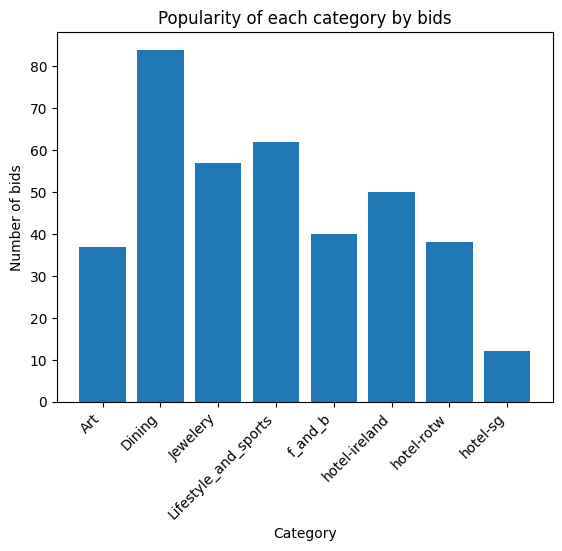

In [47]:
# plt.bar(cat_df['category'] , cat_df['no_bids'])
plt.bar(cat_sum.index , cat_sum['no_bids'])
plt.xlabel('Category')
plt.ylabel('Number of bids')
plt.title('Popularity of each category by bids')
plt.xticks(rotation=45, ha='right')
plt.show()

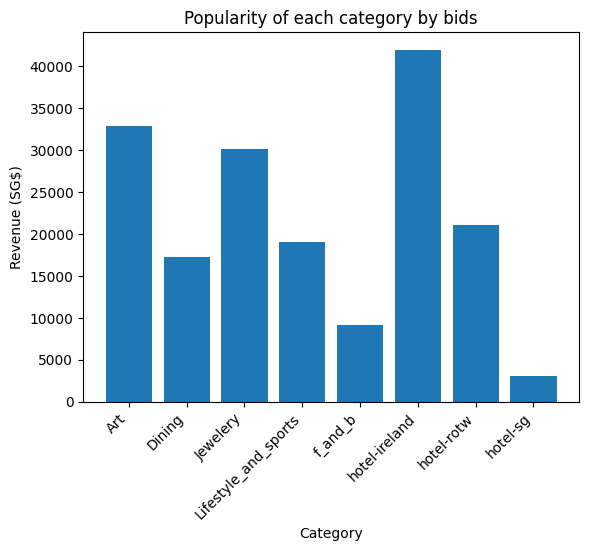

In [53]:
# Top categories by revenue collected
plt.bar(cat_sum.index , cat_sum['price'])
plt.xlabel('Category')
plt.ylabel('Revenue (SG$)')
plt.title('Popularity of each category by bids')
plt.xticks(rotation=45, ha='right')
plt.show()

In [51]:
print(f'Total raised = SG${cat_sum['price'].sum()}')

Total raised = SG$174430
